In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
#Read all training samples
subject1_t1 = np.loadtxt("data_psd/train_subject1_psd01.asc")
subject1_t2 = np.loadtxt("data_psd/train_subject1_psd02.asc")
subject1_t3 = np.loadtxt("data_psd/train_subject1_psd03.asc")

subject2_t1 = np.loadtxt("data_psd/train_subject2_psd01.asc")
subject2_t2 = np.loadtxt("data_psd/train_subject2_psd02.asc")
subject2_t3 = np.loadtxt("data_psd/train_subject2_psd03.asc")

subject3_t1 = np.loadtxt("data_psd/train_subject3_psd01.asc")
subject3_t2 = np.loadtxt("data_psd/train_subject3_psd02.asc")
subject3_t3 = np.loadtxt("data_psd/train_subject3_psd03.asc")


subject1 = np.concatenate((subject1_t1, subject1_t2, subject1_t3), axis=0)
subject2 = np.concatenate((subject2_t1, subject2_t2, subject2_t3), axis=0)
subject3 = np.concatenate((subject3_t1, subject3_t2, subject3_t3), axis=0)

In [25]:
print(len(subject1),len(subject2),len(subject3))

10528 10400 10288


In [19]:
def get_averaged_data(data):
    averaged_data = np.zeros(len(data)/8,1);  #new sample = average of 8 consecutive sample
    
    #calculate average


In [5]:
D = np.loadtxt("data_psd/train_subject1_psd01.asc")

X = np.delete(D, 96, 1)
t = D[:,96]

In [98]:
#summary
N = 96
data = pd.DataFrame(X)
data['Class'] = (pd.DataFrame(t).astype('category')).replace([2.0, 3.0, 7.0], ['left','right', 'word'])
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
count,3488.000000,3488.000000,3488.000000,3488.000000,3488.000000,3488.000000,3488.000000,3488.000000,3488.000000,3488.000000,...,3488.000000,3488.000000,3488.000000,3488.000000,3488.000000,3488.000000,3488.000000,3488.000000,3488.000000,3488.000000
mean,0.016312,0.017525,0.016149,0.007572,0.005453,0.004733,0.005124,0.005252,0.003631,0.002777,...,0.015684,0.012196,0.009685,0.007915,0.006830,0.006109,0.004886,0.004318,0.003774,0.003072
std,0.010373,0.014199,0.013875,0.004791,0.003454,0.003101,0.003346,0.003735,0.002299,0.001862,...,0.009861,0.008128,0.005706,0.004808,0.004159,0.003562,0.002996,0.002779,0.002460,0.002028
min,0.000311,0.000726,0.000646,0.000095,0.000270,0.000242,0.000205,0.000104,0.000052,0.000084,...,0.000192,0.000410,0.000356,0.000203,0.000351,0.000285,0.000161,0.000249,0.000086,0.000129
25%,0.008803,0.008023,0.006722,0.004210,0.002881,0.002387,0.002685,0.002527,0.001905,0.001421,...,0.008294,0.006536,0.005521,0.004386,0.003669,0.003456,0.002647,0.002249,0.001935,0.001693
50%,0.014267,0.013745,0.012127,0.006542,0.004662,0.004075,0.004390,0.004273,0.003087,0.002366,...,0.013531,0.010410,0.008542,0.006921,0.006182,0.005548,0.004328,0.003718,0.003167,0.002634
75%,0.021060,0.022083,0.020710,0.009839,0.007204,0.006289,0.006793,0.007011,0.004887,0.003679,...,0.020937,0.015684,0.012515,0.010531,0.008968,0.007992,0.006472,0.005625,0.005039,0.003907
max,0.083988,0.108891,0.105567,0.041300,0.024385,0.024310,0.023450,0.025580,0.014140,0.013748,...,0.065076,0.064031,0.041423,0.034947,0.028363,0.022747,0.026113,0.018851,0.016721,0.015960


In [86]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, t, test_size=0.33, random_state=42)

In [6]:
#missing values
data.isnull().sum().sum()

0

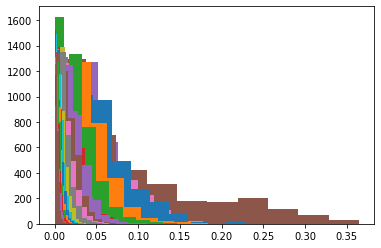

In [7]:
#distributions/outliers
for i in range(0,N):
    plt.hist(data[i])  


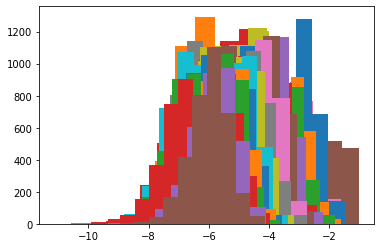

In [8]:
for i in range(0,N):
    plt.hist(np.log(data[i]))


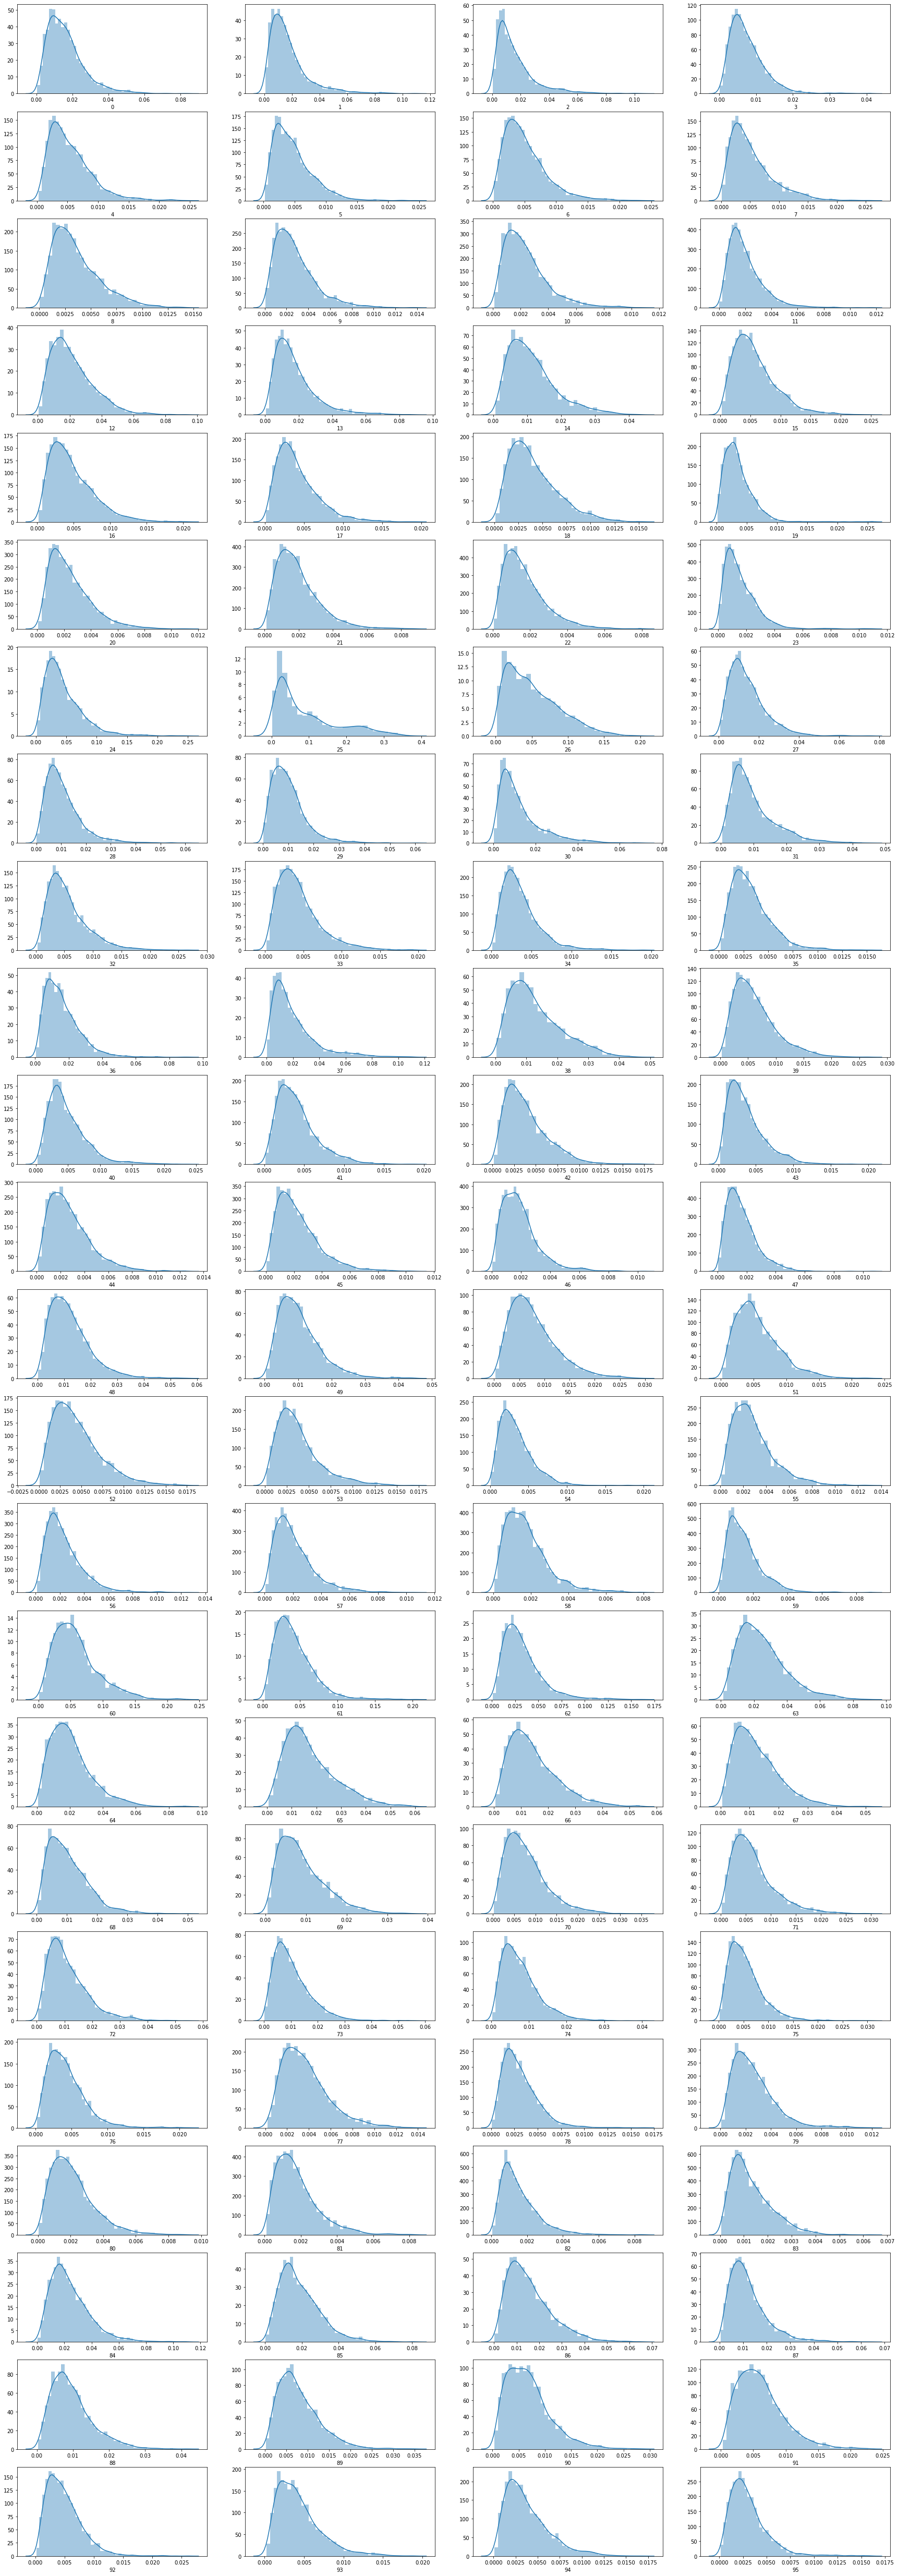

In [9]:
fig = plt.figure(figsize=(30,90))

for i in range(0,N):
    ax = fig.add_subplot(24,4,i+1)
    sns.distplot(data[i])

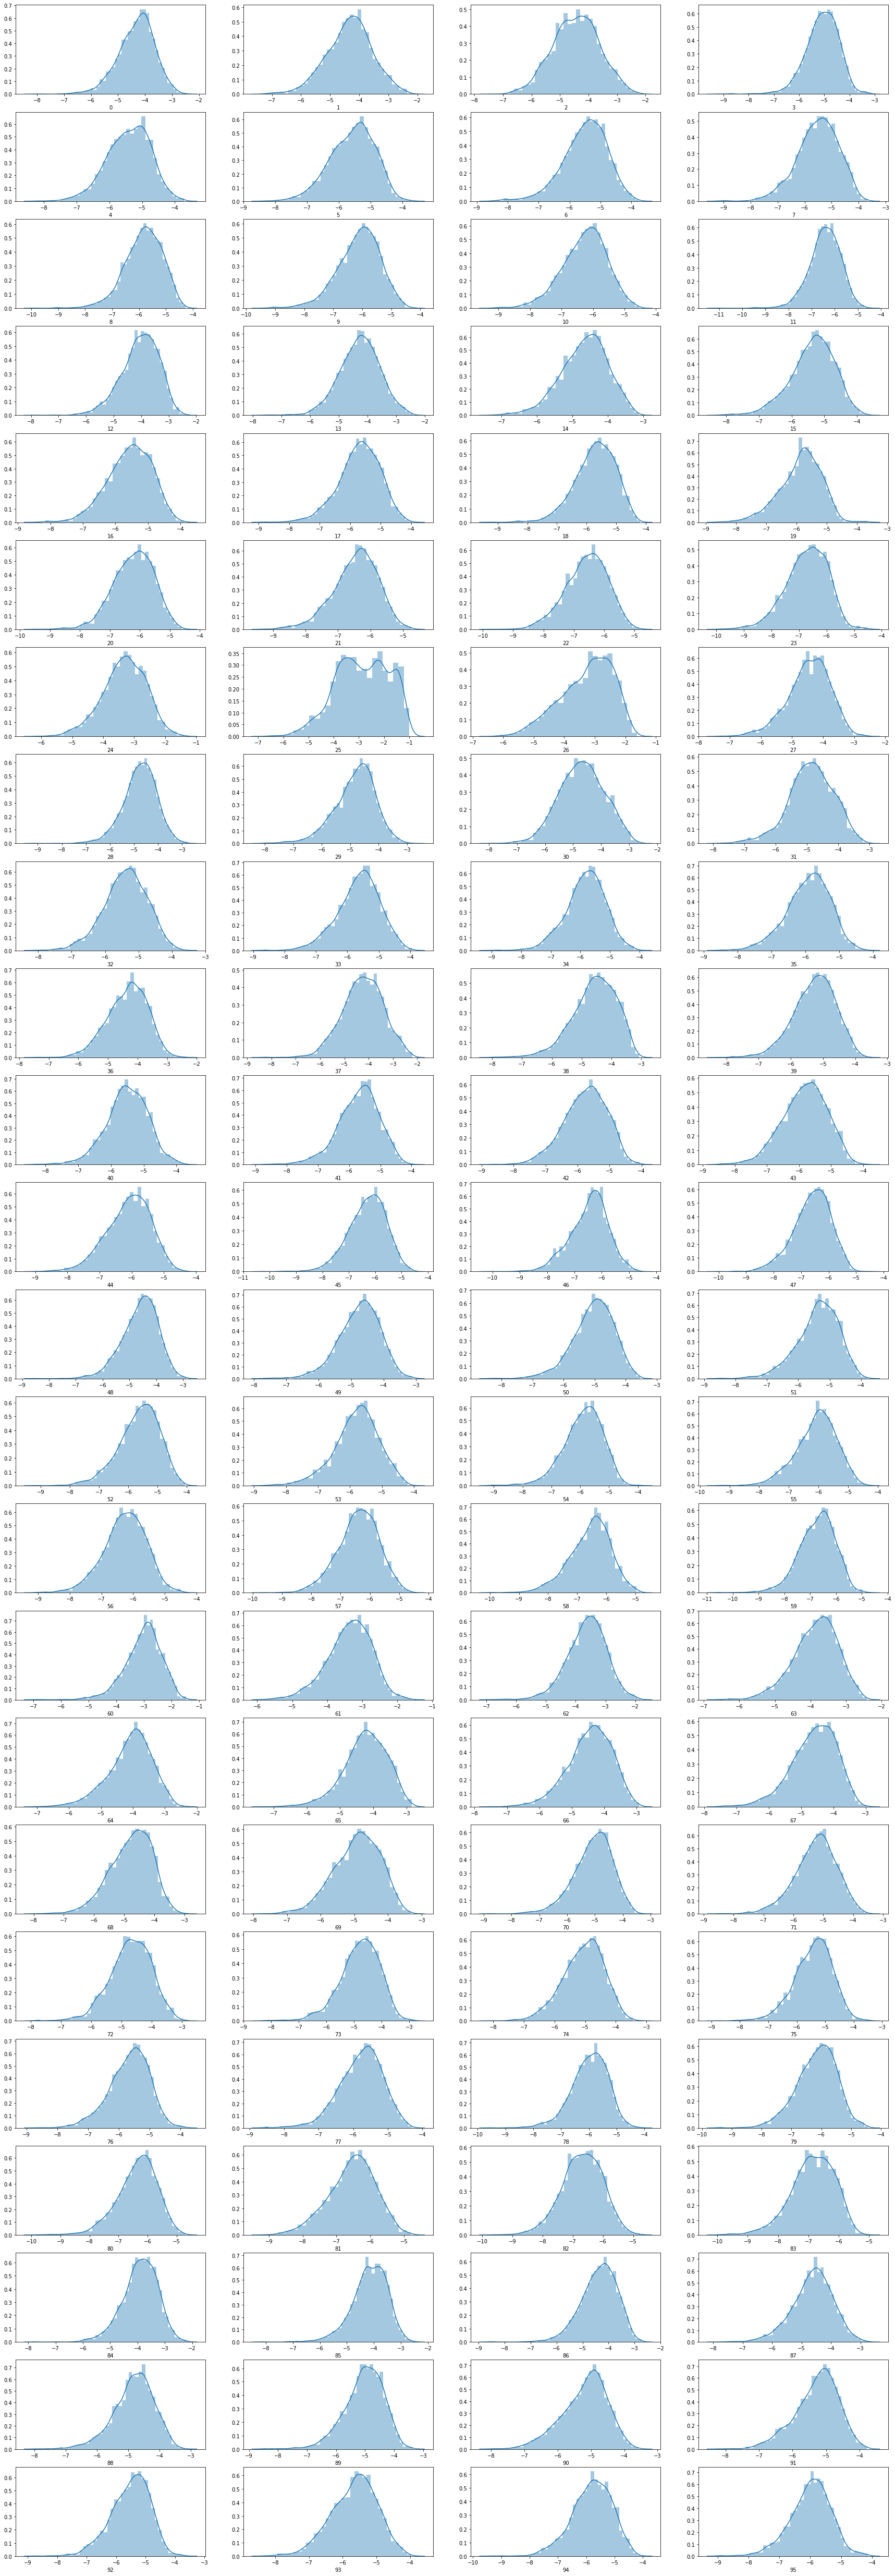

In [12]:
fig = plt.figure(figsize=(30,90))

for i in range(0,N):
    ax = fig.add_subplot(24,4,i+1)
    sns.distplot(np.log(data[i]))
       
# preguntar a javier por gaussianidad

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(100, 100))
#plot = sns.heatmap(data=correlation_matrix, annot=True)

#fig = plot.get_figure()
#fig.savefig("output.png")

In [87]:
# LDA classification/visualization

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()
data_trans = pd.DataFrame(lda_model.fit_transform((X_train), y_train))

print('Priors:')
pd.DataFrame(lda_model.priors_)
print('Means:')
pd.DataFrame(lda_model.means_)
print('Coefs:')
pd.DataFrame(lda_model.scalings_)
print('Explained Variance Ratio')
pd.DataFrame(lda_model.explained_variance_ratio_ )

Priors:
Means:
Coefs:
Explained Variance Ratio


,0
0,0.906674
1,0.093326


In [88]:
lda_model.score(np.log(X_train),y_train)
lda_model.score((X_test),y_test)

0.5876736111111112

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32421c9eb8>,
      dtype=object)

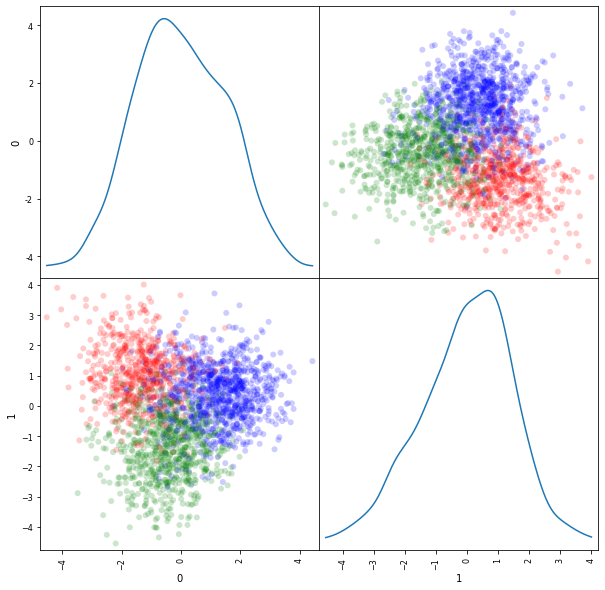

In [41]:
from pandas.plotting import scatter_matrix

colors_class = {2.0:'r', 3.0:'g', 7.0:'b'}

scatter_matrix(data_trans, 
               alpha=0.2, 
               figsize=(10, 10), 
               diagonal='kde',
               marker='o', 
               c=list(map(lambda x: colors_class[x], y_train) ))




Explained Variance Ratios: 
  [1.19481829e-01 4.06293535e-02 3.26264563e-02 2.95414700e-02
 2.68397094e-02 2.60585220e-02 2.35924788e-02 2.30173192e-02
 2.21953535e-02 2.09172178e-02 2.00290742e-02 1.94681812e-02
 1.91838897e-02 1.84406263e-02 1.81216775e-02 1.78732906e-02
 1.73777278e-02 1.67778491e-02 1.65744293e-02 1.61438480e-02
 1.56577166e-02 1.48045816e-02 1.43384804e-02 1.41076621e-02
 1.35317677e-02 1.34155213e-02 1.30719557e-02 1.27362456e-02
 1.20200833e-02 1.16414343e-02 1.15491717e-02 1.14590953e-02
 1.10357492e-02 1.07605315e-02 1.03753770e-02 9.80343418e-03
 9.69243065e-03 9.53550517e-03 9.22270653e-03 8.76217553e-03
 8.49006794e-03 8.42369872e-03 8.25707801e-03 8.14643261e-03
 7.62840765e-03 7.43955196e-03 7.37927356e-03 7.17820199e-03
 6.80098699e-03 6.62146710e-03 6.28113090e-03 6.07953787e-03
 6.05657004e-03 5.73149560e-03 5.71147945e-03 5.50209879e-03
 5.17833448e-03 4.83087221e-03 4.77624178e-03 4.61341377e-03
 4.42071207e-03 4.37808580e-03 4.29908003e-03 4.0030674

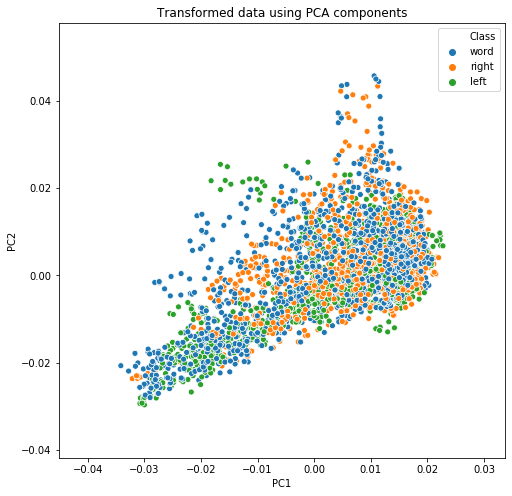

In [16]:
#PCA 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
        
GroupedData = data.sort_values('Class')
GroupedFeatures = GroupedData.drop(columns='Class')

myPCA = PCA(whiten=True)
myPCA.fit(StandardScaler().fit_transform(GroupedFeatures));
transformed = myPCA.transform(GroupedFeatures)

transformed = pd.DataFrame(transformed)
transformed['Class'] = pd.DataFrame(GroupedData['Class']).astype('category')

fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x=0, y=1, hue='Class',
                     data=transformed)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.title("Transformed data using PCA components");
print('Explained Variance Ratios: \n ',myPCA.explained_variance_ratio_)  